In [49]:
import importlib
import utils
import transformers
import models
import losses

In [50]:
from models import *
from utils import *

In [51]:
importlib.reload(utils)
importlib.reload(transformers)
importlib.reload(models)
importlib.reload(losses)

<module 'losses' from 'd:\\Documents\\machinelearning\\cgm-paper\\src\\losses.py'>

In [52]:
print("Current working directory: ", os.getcwd())

Current working directory:  d:\Documents\machinelearning\cgm-paper\src


In [53]:
raw_dir = "../data/raw"
tuning_dir = "../data/tuning"

In [54]:
assert os.path.exists(raw_dir), "Raw data directory not found"
assert os.path.exists(tuning_dir), "Tuning data directory not found"

In [55]:
dataset = load_data(raw_dir)

Found 22 files in ../data/raw
train (139415, 47)
test (32912, 47)


In [56]:
val_dataset = load_data(tuning_dir)

Found 2 files in ../data/tuning
train (13630, 43)
test (3002, 43)


In [57]:
for key in dataset.keys():
    val_dataset[key] = reduce_classes(val_dataset[key])
    dataset[key] = reduce_classes(dataset[key])

In [58]:
dataset.get("train")['Time'].isnull().sum()

0

In [59]:
train_data = get_train_dataset(dataset['train'])
test_data = get_any_dataset(dataset['test'], dataset['train'])

      CGM  month  day  hour  minute  weekday  cgm_velo  CGM(1)  CGM(2)  \
6    71.0      5   19    12       5        2  0.010000    66.0    64.5   
7    78.0      5   19    12      10        2  0.016667    71.0    68.5   
8    90.0      5   19    12      15        2  0.023333    78.0    74.5   
9    99.0      5   19    12      20        2  0.040000    90.0    84.0   
10  110.0      5   19    12      25        2  0.030000    99.0    94.5   

       CGM(3)  CGM(4)  CGM(5)     CGM(6)  
6   64.666667   65.50    66.8  68.333333  
7   66.666667   66.25    66.6  67.500000  
8   71.666667   69.50    68.6  68.500000  
9   79.666667   76.25    73.6  72.166667  
10  89.000000   84.50    80.8  77.833333  


The tuning data will be merged with the training data and be fitted into the pipeline to be used for the validation data

In [60]:
tuning_data = get_tuning_dataset(val_dataset['train'], dataset['train'])
val_data = get_any_dataset(val_dataset['test'], tuning_data)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000022470316AE0>>
Traceback (most recent call last):
  File "C:\Users\Tawan\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Tawan\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1533, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


In [ ]:
models = Models()

In [ ]:
from sklearn.model_selection import train_test_split

trainX, trainY = train_data.drop(["CGM"], axis = 1), train_data["CGM"]
trainX.shape, trainY.shape

((123697, 12), (123697,))

In [ ]:
testX, testY = test_data.drop(["CGM"], axis = 1), test_data["CGM"]
testX.shape, testY.shape

((28455, 12), (28455,))

  0%|          | 0/8 [00:00<?, ?it/s]

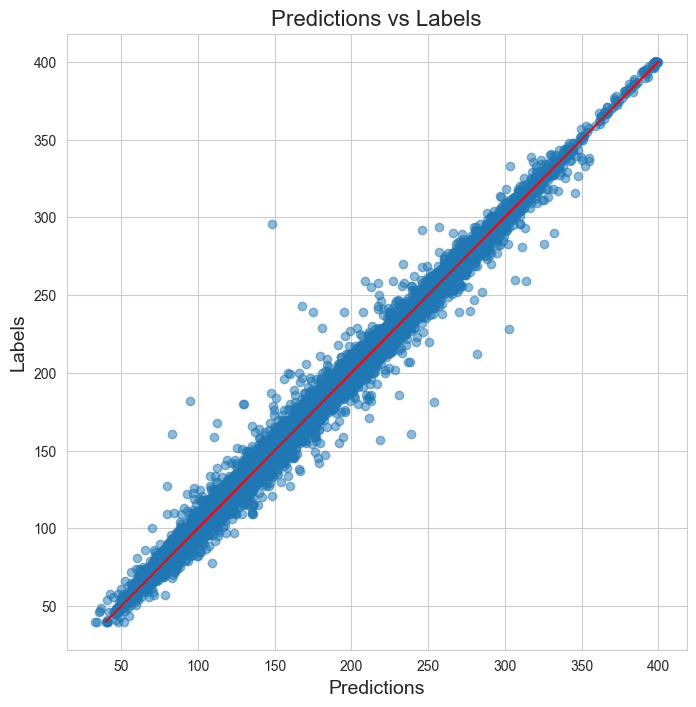

 12%|█▎        | 1/8 [00:00<00:01,  3.62it/s]

Ridge MSE: 19.413260272622868, RMSE: 4.406048146879794, MSPE: 0.0862696812822765%


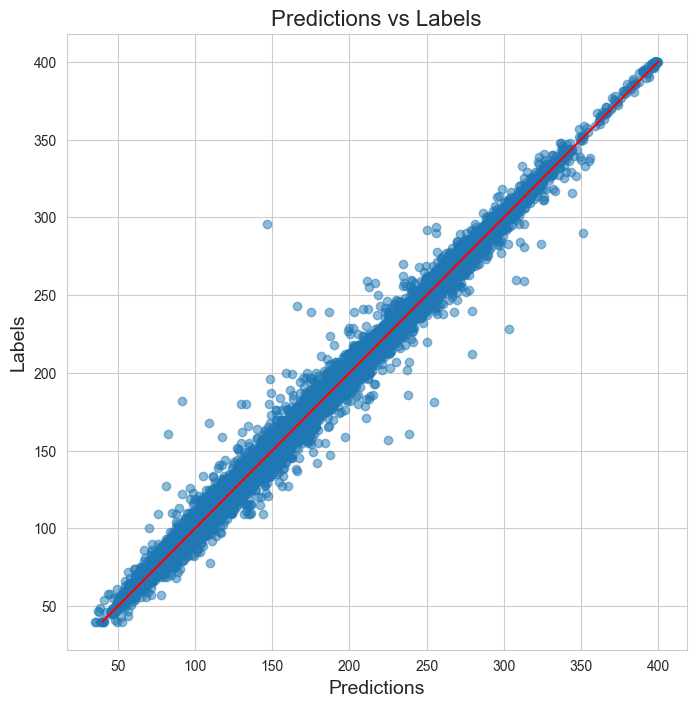

 25%|██▌       | 2/8 [00:04<00:14,  2.48s/it]

Lasso MSE: 20.850362910870622, RMSE: 4.5662197615610465, MSPE: 0.0930372768876917%


 25%|██▌       | 2/8 [00:09<00:28,  4.76s/it]


KeyboardInterrupt: 

In [ ]:
models.fit(trainX, trainY, testX, testY)